In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from operator import itemgetter
from time import gmtime, strftime
import warnings
import plotly.plotly as py
import gc
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) # display all columns in head
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=4)

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
data.head(2)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,...,69900c0d1,65b3354f4,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e3697

In [4]:
test.head(2)

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,c38ca8ae3,...,69900c0d1,65b3354f4,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e3

In [5]:
data['test']=0
test['test']=1
test['target']=0

In [6]:
data.head(1)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,...,65b3354f4,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e369704a1,7df9e

In [7]:
test.head(1)

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,c38ca8ae3,...,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e369704a1,7df9efba5,f5

# Feature Engineering

### 1. Calculate total per record

In [8]:
cols = list(test)
cols.insert(1, cols.pop(cols.index('target')))
test = test.ix[:, cols]

cols.insert(2, cols.pop(cols.index('test')))
test = test.ix[:, cols]
data = data.ix[:, cols]

In [9]:
data = pd.concat([data,test])

In [10]:
trial = data.drop(['ID','target','test'],axis=1).columns.values
trialori = trial

In [11]:
trialcol=[]
for i in trial:
    varname=str(i)+'_True'
    trialcol.append(varname)
    data[varname] = np.where(data[i] >0,1,0)

In [12]:
trial = data.drop(['ID','target','test'],axis=1).T

In [13]:
input_val=np.array(trial)
total = pd.DataFrame([sum(x) for x in zip(*input_val)])

In [14]:
data['total'] = total

### 2. Calculate % by total of each product (Column)

Question : for overall dataset or should separate train and test for calculation?

In [15]:
productCol_Percent = trialori+'_%'

In [16]:
#databk=data
data[productCol_Percent] = data[trialori] / data[trialori].sum()

### 3. Calculate % by total of each record 

In [17]:
productRow_Percent=[]
for i in trialori:
    productRow_Percent.append(i)
    varname = i + '_row_%'
    data[varname] = data[i] / data['total']

### 4. Calculate % by total Product by each record

In [18]:
data[trialcol] = data[trialcol].astype(int)

In [19]:
input_val=np.array(data[trialcol])
for i in input_val:
    data['total_No_of_Poduct'] =np.sum(i)

In [20]:
#data.to_pickle("./data_v2.pkl")

In [21]:
data['Total<Target'] = np.where( data['total']< data['target'],1,0)
data['Total>Target'] = np.where( data['total']< data['target'],1,0)
data['Total/Target'] = (data['total']/data['target'])
data['Total/Target_Bin'] = pd.qcut(data[data['test']==0]['Total/Target'].rank(method='first'),q=10 ,labels=False)

In [22]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=25, random_state=1234)
temp=data[data['test']==0].drop(['ID','target','test','Total<Target','Total>Target','Total/Target','Total/Target_Bin'],axis=1)
datasvd_train = pd.DataFrame(svd.fit_transform(temp))
datasvd_train.columns=['SVD_0','SVD_1','SVD_2','SVD_3','SVD_4','SVD_5','SVD_6','SVD_7','SVD_8','SVD_9','SVD_10',
                       'SVD_11','SVD_12','SVD_13','SVD_14','SVD_15','SVD_16','SVD_17','SVD_18','SVD_19']
scdarray=datasvd_train.columns.values

In [23]:
temp=data[data['test']==1].drop(['ID','target','test','Total<Target','Total>Target','Total/Target','Total/Target_Bin'],axis=1)
datasvd_test = pd.DataFrame(svd.transform(temp))
datasvd_test.columns=['SVD_0','SVD_1','SVD_2','SVD_3','SVD_4','SVD_5','SVD_6','SVD_7','SVD_8','SVD_9','SVD_10',
                       'SVD_11','SVD_12','SVD_13','SVD_14','SVD_15','SVD_16','SVD_17','SVD_18','SVD_19']

In [24]:
temp1 = pd.concat([datasvd_train,datasvd_test])
for i in temp1.columns.values:
    data[i]=temp1[i]

In [25]:
from sklearn.decomposition import SparsePCA

spca = SparsePCA(n_components=20,  random_state=1234)
temp=data[data['test']==0].drop(['ID','target','test','Total<Target','Total>Target','Total/Target','Total/Target_Bin'],axis=1)
dataSPPCA_train = pd.DataFrame(spca.fit_transform(temp))
dataSPPCA_train.columns=['SPCA_0','SPCA_1','SPCA_2','SPCA_3','SPCA_4','SPCA_5','SPCA_6','SPCA_7','SPCA_8','SPCA_9','SPCA_10',
                       'SPCA_11','SPCA_12','SPCA_13','SPCA_14','SPCA_15','SPCA_16','SPCA_17','SPCA_18','SPCA_19']
spcaarray=dataSPPCA_train.columns.values

In [26]:
temp=data[data['test']==1].drop(['ID','target','test','Total<Target','Total>Target','Total/Target','Total/Target_Bin'],axis=1)
dataSPPCA_test = pd.DataFrame(spca.transform(temp))
dataSPPCA_test.columns=['SVD_0','SVD_1','SVD_2','SVD_3','SVD_4','SVD_5','SVD_6','SVD_7','SVD_8','SVD_9','SVD_10',
                       'SVD_11','SVD_12','SVD_13','SVD_14','SVD_15','SVD_16','SVD_17','SVD_18','SVD_19']

In [27]:
temp1 = pd.concat([dataSPPCA_train,dataSPPCA_test])
for i in temp1.columns.values:
    data[i]=temp1[i]
del temp,temp1
gc.collect()

211

###  5. Assign Cluster group by product

In [28]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

kmean = data[trialcol]

In [29]:
k_means = KMeans(init='k-means++', n_clusters=10, n_init=10,random_state =1234,n_jobs =-1)
k_means.fit(kmean)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

In [30]:
sim_data= kmean

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(cosine_similarity(sim_data.transpose(), sim_data.transpose()))

In [ ]:
from time import gmtime, strftime
sse = {}
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
for k in range(1, 200):
     #print(str(k) + '  : ' + str(strftime("%Y-%m-%d %H:%M:%S", gmtime())))
    kmeans = KMeans(init='k-means++',n_clusters=k, max_iter=1000,n_jobs=-1,random_state =1234).fit(similarity_matrix)
    
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

2018-06-26 03:18:51


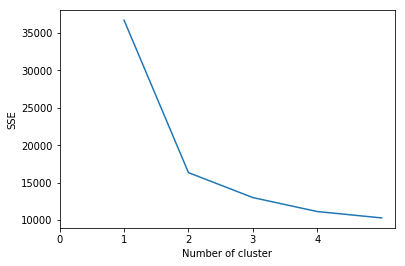

In [31]:
from time import gmtime, strftime
sse = {}
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
for k in range(1, 6):
    kmeans = KMeans(init='k-means++',n_clusters=k, max_iter=1000,n_jobs=-1,random_state =1234).fit(similarity_matrix)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.xticks(np.arange(5))
plt.ylabel("SSE")
plt.show()

2018-06-26 13:36:07


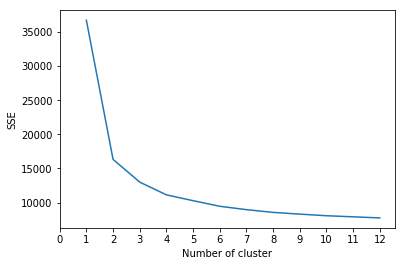

In [24]:
from time import gmtime, strftime
sse = {}
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
for k in range(1, 13):
    kmeans = KMeans(init='k-means++',n_clusters=k, max_iter=1000,n_jobs=-1,random_state =1234).fit(similarity_matrix)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.xticks(np.arange(13))
plt.ylabel("SSE")
plt.show()

In [ ]:

sse = {}
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
for k in range(1,1001):
    kmeans = KMeans(init='k-means++',n_clusters=k, max_iter=1000,n_jobs=1,random_state =1234).fit(similarity_matrix)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.xticks(np.arange(13))
plt.ylabel("SSE")
plt.show()
#at 29 jun fri 10:12pm

2018-06-29 14:13:34


In [32]:
kmeans_2 = KMeans(init='k-means++',n_clusters=2, max_iter=1000,n_jobs=-1,random_state =1234).fit(similarity_matrix)
labels_2 = kmeans_2.predict(similarity_matrix)

kmeans_5 = KMeans(init='k-means++',n_clusters=5, max_iter=1000,n_jobs=-1,random_state =1234).fit(similarity_matrix)
labels_5 = kmeans_5.predict(similarity_matrix)

In [33]:
similarity_matrix_mapping = similarity_matrix
similarity_matrix_mapping.columns=trialori
similarity_matrix_mapping = similarity_matrix_mapping.T
similarity_matrix_mapping.columns=trialori

In [34]:
kmean_2_mapping = pd.DataFrame([trialori,labels_2])
kmean_2_mapping.columns=kmean_2_mapping.iloc[0]
kmean_2_mapping = kmean_2_mapping.reindex(kmean_2_mapping.index.drop(0))
kmean_2_mapping = kmean_2_mapping.T 
kmean_2_mapping.reset_index(level=0,inplace=True)
kmean_2_mapping.columns=['product','value']

kmean_5_mapping = pd.DataFrame([trialori,labels_5])
kmean_5_mapping.columns=kmean_5_mapping.iloc[0]
kmean_5_mapping = kmean_5_mapping.reindex(kmean_5_mapping.index.drop(0))
kmean_5_mapping = kmean_5_mapping.T 
kmean_5_mapping.reset_index(level=0,inplace=True)
kmean_5_mapping.columns=['product','value']

In [35]:
def getCluster(product,cluster='cluster2'):
   
    if cluster=='cluster2':
        rcluster = kmean_2_mapping[kmean_2_mapping['product']==product]['value']
    else:
        rcluster = kmean_5_mapping[kmean_5_mapping['product']==product]['value']
    rcluster = pd.Series(rcluster).iloc[0]
    return rcluster

In [36]:
#Assign to group
cluster_2_col=[]
cluster_5_col=[]

for i in trialori:
    
    varname_2= i + '_clus_2'
    varname_5= i + '_clus_5'
    
    cluster_2_col.append(varname_2)
    cluster_5_col.append(varname_5)
    
    
    data[varname_2] = getCluster(i,'cluster2')
    data[varname_5] = getCluster(i,'cluster5')

In [44]:
kmean_5_mapping.head(1)

,product,value
0,48df886f9,0


cluster_5_0=[]
cluster_5_1=[]
cluster_5_2=[]
cluster_5_3=[]
cluster_5_4=[]
cluster=pd.DataFrame(columns=['cluster_5_0','cluster_5_1','cluster_5_2','cluster_5_3','cluster_5_4'])

for i in trialori:
    varname_5= i + '_clus_5'
    varname_a=i+'_temp'
    col = np.append(i,varname_5)
    temp=data[col]

In [37]:
# Count No of product in a specific cluster

data['cluster_5_total_0'] = (data[cluster_5_col]==0).sum(axis=1)
data['cluster_5_total_1'] = (data[cluster_5_col]==1).sum(axis=1)
data['cluster_5_total_2'] = (data[cluster_5_col]==2).sum(axis=1)
data['cluster_5_total_3'] = (data[cluster_5_col]==3).sum(axis=1)
data['cluster_5_total_4'] = (data[cluster_5_col]==4).sum(axis=1)

isY = lambda x:int(x>0)
cluster = lambda row: isY(trialori)
data.apply(cluster,axis=1)

### Cluster group value

In [15]:
#data.loc[data[cluster_5_col]==0,trialori]

In [ ]:
data.to_pickle("./data_v5.pkl")

In [3]:
def getSTD(feature,train=True):
    if train==True:
        return np.std(data[data['test']==0][feature])
    else:
        return np.std(data[data['test']==1][feature])

In [4]:
from joblib import Parallel, delayed
import multiprocessing

Zero_STD=[]

def processInput(i):
    result=getSTD(i,True)
    if result ==0:
        Zero_STD.append(i)
        
num_cores = multiprocessing.cpu_count()
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
results = Parallel(n_jobs=2)(delayed(processInput)(i) for i in trialori) 
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
#results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in trialori)  

2018-07-01 19:16:50


KeyboardInterrupt: 

In [19]:
# bayesian_blocks bining
# https://jakevdp.github.io/blog/2012/09/12/dynamic-programming-in-python/
# https://towardsdatascience.com/feature-engineering-bayesian-methods-for-binning-38d29a29bb88

def bayesian_blocks(t):
    """Bayesian Blocks Implementation

    By Jake Vanderplas.  License: BSD
    Based on algorithm outlined in http://adsabs.harvard.edu/abs/2012arXiv1207.5578S

    Parameters
    ----------
    t : ndarray, length N
        data to be histogrammed

    Returns
    -------
    bins : ndarray
        array containing the (N+1) bin edges

    Notes
    -----
    This is an incomplete implementation: it may fail for some
    datasets.  Alternate fitness functions and prior forms can
    be found in the paper listed above.
    """
    # copy and sort the array
    t = np.sort(t)
    N = t.size

    # create length-(N + 1) array of cell edges
    edges = np.concatenate([t[:1],
                            0.5 * (t[1:] + t[:-1]),
                            t[-1:]])
    block_length = t[-1] - edges

    # arrays needed for the iteration
    nn_vec = np.ones(N)
    best = np.zeros(N, dtype=float)
    last = np.zeros(N, dtype=int)

    #-----------------------------------------------------------------
    # Start with first data cell; add one cell at each iteration
    #-----------------------------------------------------------------
    for K in range(N):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]

        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4  # 4 comes from the prior on the number of changepoints
        fit_vec[1:] += best[:K]

        # find the max of the fitness: this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]

    #-----------------------------------------------------------------
    # Recover changepoints by iteratively peeling off the last block
    #-----------------------------------------------------------------
    change_points =  np.zeros(N, dtype=int)
    i_cp = N
    ind = N
    while True:
        i_cp -= 1
        change_points[i_cp] = ind
        if ind == 0:
            break
        ind = last[ind - 1]
    change_points = change_points[i_cp:]

    return edges[change_points]

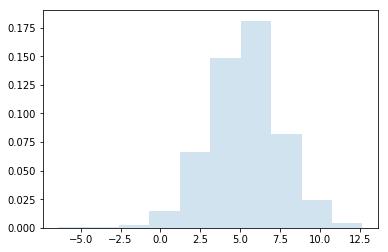

In [23]:
# plot a standard histogram in the background, with alpha transparency
H1 = plt.hist(np.log(data[data['test']==0]['Total/Target']).dropna(), bins=10, histtype='stepfilled',
          alpha=0.2, normed=True)

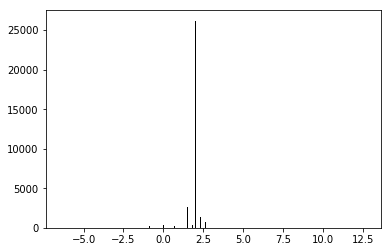

In [47]:
# plot an adaptive-width histogram on top
H2 = plt.hist(np.log(data[data['test']==0]['Total/Target']).dropna(), bins=bayesian_blocks(np.log(data[data['test']==0]['Total/Target']).dropna()), color='black',
          histtype='step', normed=True)

In [23]:
baynesian_range = bayesian_blocks(np.log(data[data['test']==0]['Total/Target']))
temp = pd.DataFrame(baynesian_range).reset_index()
temp.columns=['bayesian_bin','value']
temp =temp.sort_values(by='value')
temp.head()

,bayesian_bin,value
0,0,-6.417449e+00
1,1,-1.198942e+00
2,2,-9.162902e-01
3,3,-9.162870e-01
4,4,5.000000e-08


In [26]:
temparray = np.log(data['Total/Target'])
bayesian_bin_array = temp['value']

In [37]:
from itertools import cycle
counter=0

ctemparray = cycle(temparray)
cbayesian_bin_array = cycle(bayesian_bin_array)
for i in temparray:
    for j in bayesian_bin_array :
        if i > j and i< shift(j):
            print(j)

NameError: name 'shift' is not defined

In [39]:
from itertools import cycle

ctemparray = cycle(temparray)
ctemparray

In [54]:
#sum same cluster per record
def getclustersum(cluster):
    clustersum=0
    for i in trialori:
        if i in cluster:
            clustersum += data[i]
    return clustersum

In [55]:
data['cluster_0_sum'] = getclustersum(cluster_0)
data['cluster_1_sum'] = getclustersum(cluster_1)
data['cluster_2_sum'] = getclustersum(cluster_2)
data['cluster_3_sum'] = getclustersum(cluster_3)
data['cluster_4_sum'] = getclustersum(cluster_4)

In [63]:
#sum same cluster per record
def getclustercount(cluster):
    clustercount=0
    for i in trialori:
        if i in cluster :
            clustersum = data[data[i]>0].sum()
    return clustersum

In [ ]:
data['cluster_0_count'] = getclustercount(cluster_0)
data['cluster_1_count'] = getclustercount(cluster_1)
data['cluster_2_count'] = getclustercount(cluster_2)
data['cluster_3_count'] = getclustercount(cluster_3)
data['cluster_4_count'] = getclustercount(cluster_4)

In [ ]:
data.head(3)

In [ ]:
data.to_pickle("./data_v6.pkl")

In [95]:
temp2=data[data['test']==0]
temp2['log total/target'] = np.log(temp2['Total/Target'])
np.where( temp2['log total/target']> temp['value'], temp['bayesian_bin'])
#np.max(np.log(data[data['test']==0]['Total/Target'].dropna())),np.min(np.log(data[data['test']==0]['Total/Target'])),np.mean(np.log(data[data['test']==0]['Total/Target']))

ValueError: Can only compare identically-labeled Series objects


Zero_STD=[]

    


for i in trialori:
    result=getSTD(i,True)
    if result ==0:
        Zero_STD.append(i)

In [48]:
import pickle

with open('Zero_STD.pkl', 'wb') as f:
    pickle.dump(Zero_STD, f)
    
with open('cluster_2_col.pkl', 'wb') as f:
    pickle.dump(cluster_2_col, f)    
    
with open('cluster_5_col.pkl', 'wb') as f:
    pickle.dump(cluster_5_col, f)        

with open('productRow_Percent.pkl', 'wb') as f:
    pickle.dump(productRow_Percent, f)        

with open('productCol_Percent.pkl', 'wb') as f:
    pickle.dump(productCol_Percent, f)        

with open('trialcol.pkl', 'wb') as f:
    pickle.dump(trialcol, f)      
    
with open('trialori.pkl', 'wb') as f:
    pickle.dump(trialori, f)      
    
with open('scdarray.pkl', 'wb') as f:
    pickle.dump(scdarray, f)  
    
with open('spcaarray.pkl', 'wb') as f:
    pickle.dump(spcaarray, f)  
    
with open('cluster_0.pkl', 'wb') as f:
    pickle.dump(cluster_0, f) 
    
with open('cluster_1.pkl', 'wb') as f:
    pickle.dump(cluster_1, f) 
with open('cluster_2.pkl', 'wb') as f:
    pickle.dump(cluster_2, f) 
with open('cluster_3.pkl', 'wb') as f:
    pickle.dump(cluster_3, f) 
with open('cluster_4.pkl', 'wb') as f:
    pickle.dump(cluster_4, f)     
data.to_pickle("./data_v6.pkl")
kmean_2_mapping.to_pickle("./kmean_2_mapping.pkl")
kmean_5_mapping.to_pickle("./kmean_5_mapping.pkl")
similarity_matrix_mapping.to_pickle("./similarity_matrix_mapping.pkl")
clusterdata.to_pickle("./clusterdata.pkl")

In [14]:
import pickle

with open('Zero_STD.pkl', 'rb') as f:
    Zero_STD = pickle.load(f)

with open('cluster_2_col.pkl', 'rb') as f:
    cluster_2_col = pickle.load(f)

with open('cluster_5_col.pkl', 'rb') as f:
    cluster_5_col = pickle.load(f)

with open('productRow_Percent.pkl', 'rb') as f:
    productRow_Percent = pickle.load(f)

with open('productCol_Percent.pkl', 'rb') as f:
    productCol_Percent = pickle.load(f)

with open('trialcol.pkl', 'rb') as f:
    trialcol = pickle.load(f)
    
with open('trialori.pkl', 'rb') as f:
    trialori = pickle.load(f)

with open('cluster_0.pkl', 'rb') as f:
    cluster_0 = pickle.load(f)
with open('cluster_2.pkl', 'rb') as f:
    cluster_2 = pickle.load(f)
with open('cluster_3.pkl', 'rb') as f:
    cluster_3 = pickle.load(f)    
with open('cluster_4.pkl', 'rb') as f:
    cluster_4 = pickle.load(f)    
with open('cluster_1.pkl', 'rb') as f:
    cluster_1 = pickle.load(f)  
    
with open('scdarray.pkl', 'rb') as f:
    scdarray = pickle.load(f)  
with open('spcaarray.pkl', 'rb') as f:
    spcaarray = pickle.load(f)      
#with open('xgboost_var_list.pkl', 'rb') as f:
#    vararray = pickle.load(f)  
with open('cluster_data.pkl', 'rb') as f:
    cluster_data = pickle.load(f)  
    
data = pd.read_pickle("./data_v6.pkl")
kmean_2_mapping = pd.read_pickle("./kmean_2_mapping.pkl")
kmean_5_mapping = pd.read_pickle("./kmean_5_mapping.pkl")
similarity_matrix_mapping = pd.read_pickle("./similarity_matrix_mapping.pkl")
clusterdata  = pd.read_pickle("./clusterdata.pkl")

In [6]:
data.head(2)

,ID,target,test,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,...,4634c8fae_clus_5,f7f553aea_clus_2,f7f553aea_clus_5,9abffd22c_clus_2,9abffd22c_clus_5,2dbeac1de_clus_2,2dbeac1de_clus_5,a396ceeb9_clus_2,a396ceeb9_clus_5,56ec098a1_clus_2,56ec098a1_clus_5,ba4a02efc_clus_2,ba4a02efc_clus_5,896d1c52d_clus_2,896d1c52d_clus_5,1f8754c4e_clus_2,1f8754c4e_clus_5,ed5af35f0_clus_2,ed5af35f0_clus_5,41d1e5f8f_clus_2,41d1e5f8f_clus_5,259169df2_clus_2,259169df2_clus_5,4600aadcf_clus_2,4600aadcf_clus_5,13f3a3d19_clus_2,13f3a3d19_clus_5,2123a2089_clus_2,2123a2089_clus_5,e43343256_clus_2,e43343256_clus_5,f928893ca_clus_2,f928893ca_clus_5,acc4a8e68_clus_2,acc4a8e68_clus_5,e9a473fbb_clus_2,e9a473fbb_clus_5,a3382e205_clus_2,a3382e205_clus_5,4dcf81d65_clus_2,4dcf81d65_clus_5,7f38dafa6_clus_2,7f38dafa6_clus_5,6fa0b9dab_clus_2,6fa0b9dab_clus_5,e369704a1_clus_2,e369704a1_clus_5,7df9efba5_clus_2,7df9efba5_clus_5,f5723deba_clus_2,f5723deba_clus_5,7fd35c77a_clus_2,7fd35c77a_clus_5,9d9e518a3_clus_2,9d9e518a3_clus_5,99258443a_clus_2,99258443a_clus_5,1d81e197a_clus_2,1d81e197a_clus_5,831a9e087_clus_2,831a9e087_clus_5,de471ea65_clus_2,de471ea65_clus_5,8781e4b91_clus_2,8781e4b91_clus_5,dc5ba677f_clus_2,dc5ba677f_clus_5,df3ac443c_clus_2,df3ac443c_clus_5,79203fbab_clus_2,79203fbab_clus_5,f1ab19e7a_clus_2,f1ab19e7a_clus_5,300398f1c_clus_2,300398f1c_clus_5,6eefca12e_clus_2,6eefca12e_clus_5,22bf44001_clus_2,22bf44001_clus_5,19915a6d3_clus_2,19915a6d3_clus_5,20a325694_clus_2,20a325694_clus_5,8afae1db8_clus_2,8afae1db8_clus_5,c283d4609_clus_2,c283d4609_clus_5,11114a47a_clus_2,11114a47a_clus

In [44]:
temp = data[data['test']==0]
coltemp=['target','total']
col = np.append(trialori,coltemp)

temp = pd.DataFrame(temp[col].sum())


In [45]:
temp = data[data['test']==0]

col = np.append(trialori,'target')
temp = pd.DataFrame(temp[col].sum())
temp = temp.reset_index()
temp.columns =['product','total']

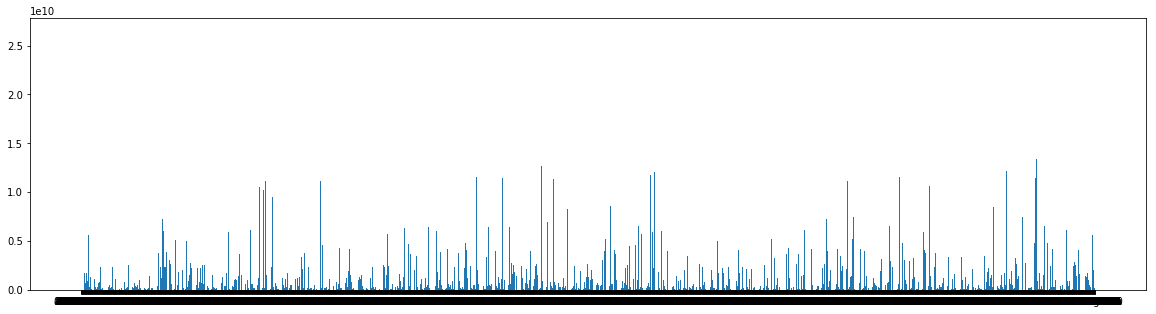

In [81]:
plt.figure(figsize=(20,5))
x = np.arange(temp.shape[0])
plt.bar(x, temp['total'])
plt.xticks(x, (temp['product']))
plt.show()

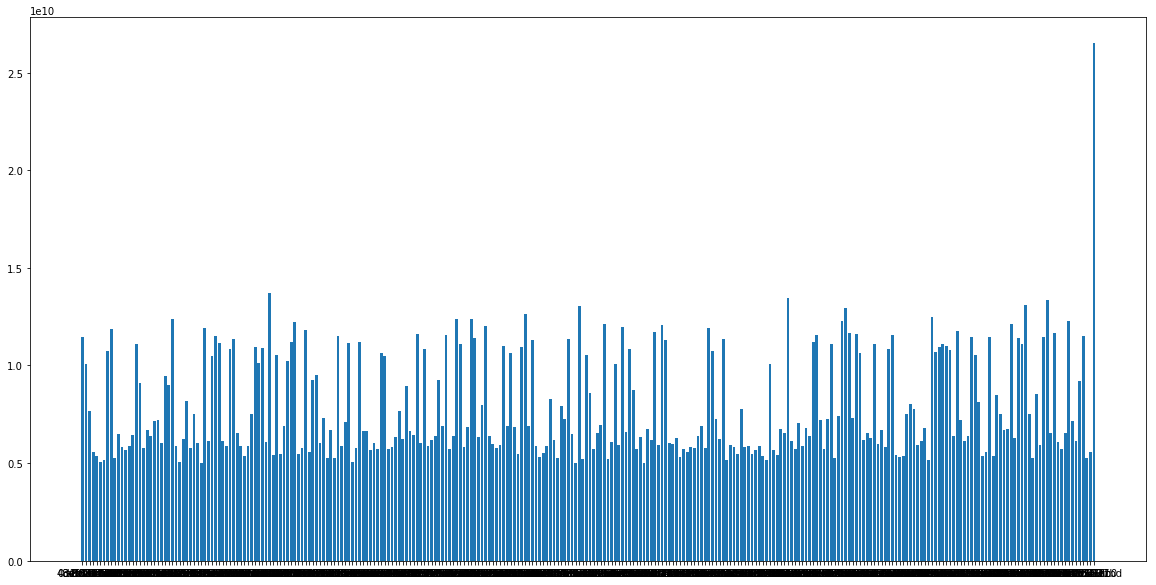

In [78]:
greaterthan=5000000000
plotdata = temp[temp['total']>greaterthan]
plt.figure(figsize=(20,10))
x = np.arange(plotdata.shape[0])
plt.bar(x,plotdata['total'] )
plt.xticks(x, (temp['product']))
plt.show()

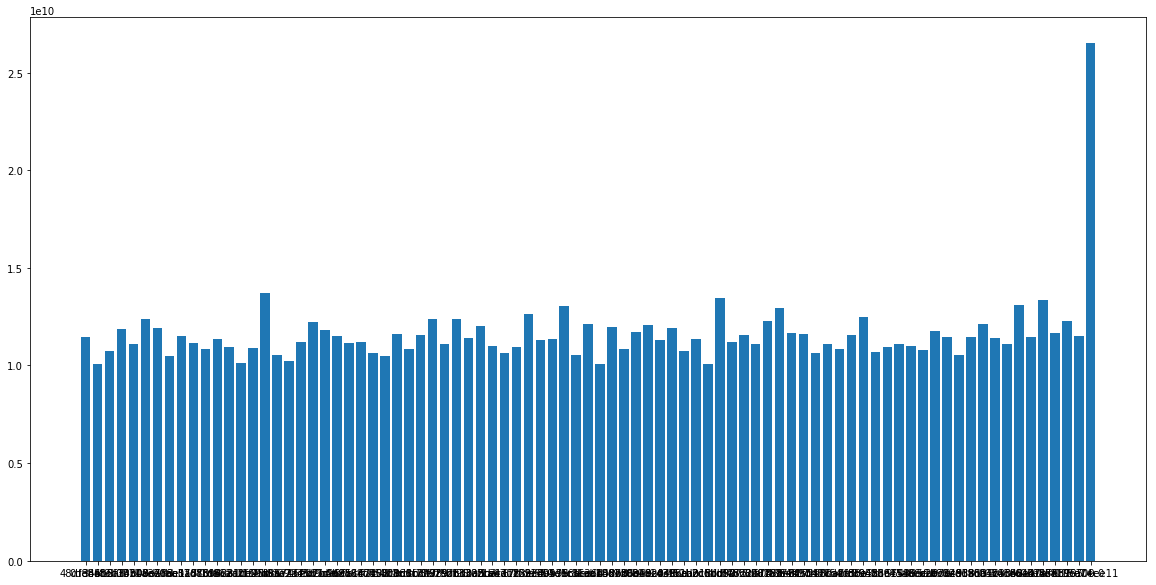

In [80]:
greaterthan=10000000000
plotdata = temp[temp['total']>greaterthan]
plt.figure(figsize=(20,10))
x = np.arange(plotdata.shape[0])
plt.bar(x,plotdata['total'] )
plt.xticks(x, (temp['product']))
plt.show()

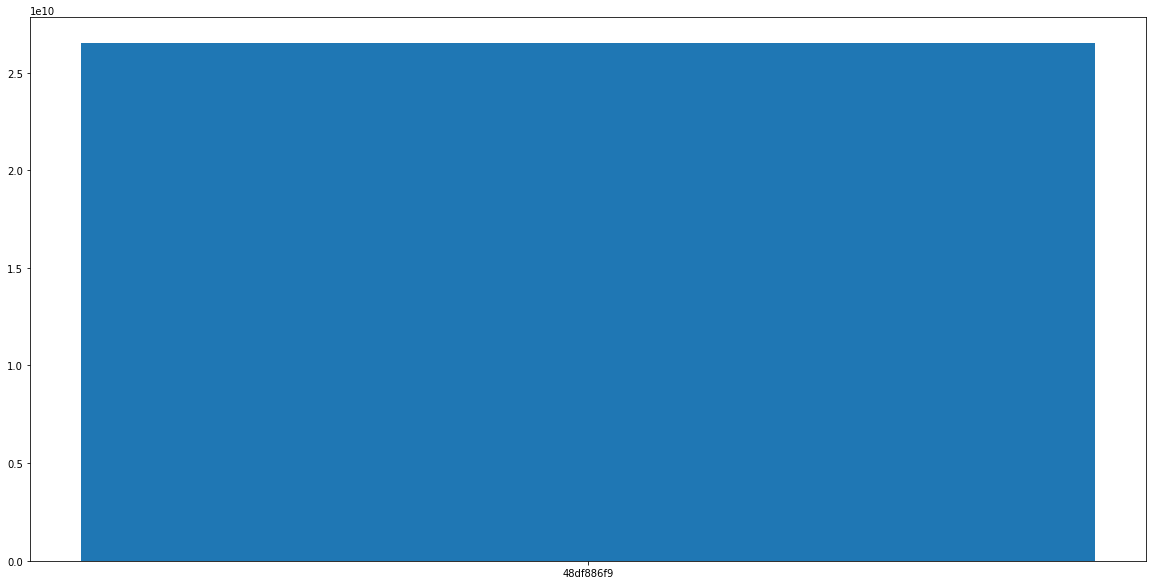

In [82]:
greaterthan=20000000000
plotdata = temp[temp['total']>greaterthan]
plt.figure(figsize=(20,10))
x = np.arange(plotdata.shape[0])
plt.bar(x,plotdata['total'] )
plt.xticks(x, (temp['product']))
plt.show()

In [46]:
clusterdata = pd.merge(temp,kmean_5_mapping,how='left',left_on='product',right_on='product')

plt.figure(figsize=(18, 15))
g=sns.barplot(x='value', y='total', data=clusterdata
              ,hue='product',palette="Set2")
plt.xticks(rotation=90)
plt.show()

In [47]:
clusterdata.head(1)

,product,total,value
0,48df886f9,65346333.32,0


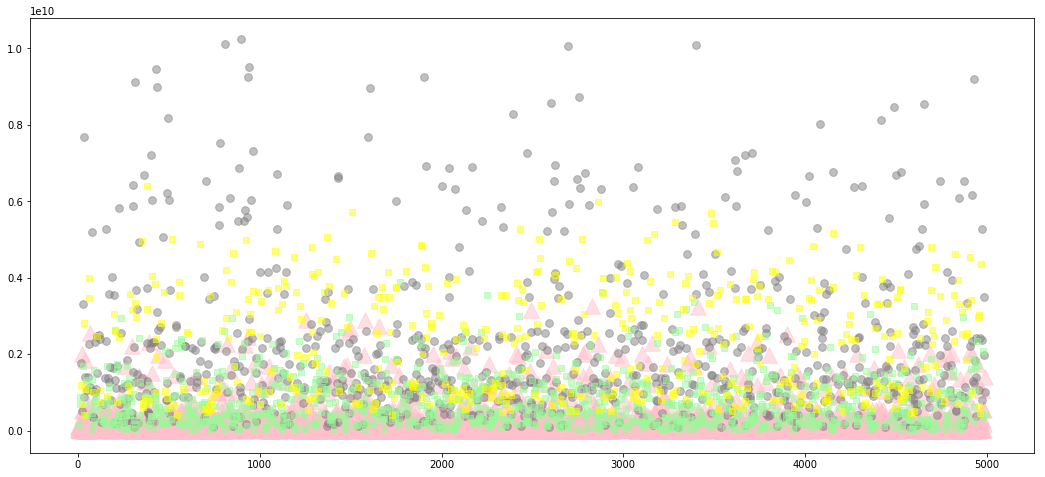

In [74]:

fig, ax = plt.subplots(figsize=(18, 8))
num = 1000
s = 121
setalpha=0.5
ax.scatter(clusterdata[clusterdata['value']==0].index, clusterdata[clusterdata['value']==0]['total'], color='pink', s=2*s, marker='^', alpha=setalpha)
ax.scatter(clusterdata[clusterdata['value']==1].index, clusterdata[clusterdata['value']==1]['total'], color='grey', s=s/2, alpha=setalpha)
ax.scatter(clusterdata[clusterdata['value']==2].index, clusterdata[clusterdata['value']==2]['total'], color='palegreen', s=s/3, marker='s', alpha=setalpha)
ax.scatter(clusterdata[clusterdata['value']==3].index, clusterdata[clusterdata['value']==3]['total'], color='purple', s=s/3, marker='', alpha=setalpha)
ax.scatter(clusterdata[clusterdata['value']==4].index, clusterdata[clusterdata['value']==4]['total'], color='yellow', s=s/3, marker='s', alpha=setalpha)


#plot_url = py.plot_mpl(fig, filename="mpl-complex-scatter")
plt.show()

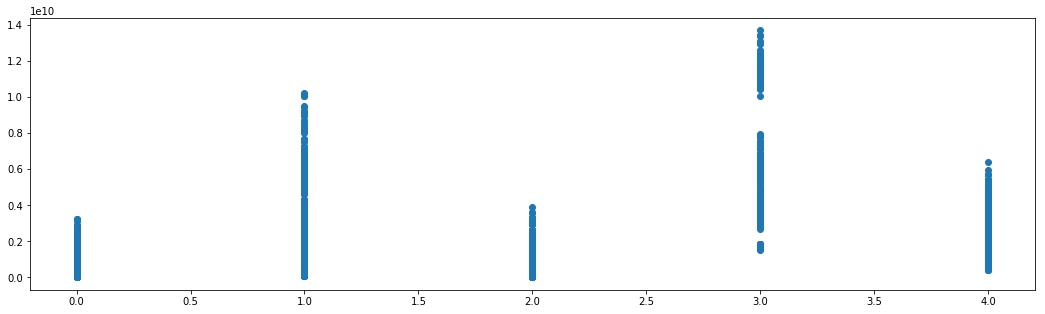

In [66]:
plt.figure(figsize=(18, 5))
plt.scatter(clusterdata['value'],clusterdata['total'])
plt.show()

In [50]:
# Sum product value that in same cluster
def createClusterArray(value=0):
    temp1 = kmean_5_mapping[kmean_5_mapping['value']==value].T
    new_header = temp1.iloc[0]
    temp1.columns=new_header
    temp1 = temp1.iloc[1:]
    return temp1

In [51]:
no_ofcluster = kmean_5_mapping['value'].unique()
for i in no_ofcluster:
    varname = 'cluster_'+str(i)
    print(varname)
    varnamefilename = varname
    varname = []
    varname = createClusterArray(i)
    
#    with open(str(varnamefilename)+'.pkl', 'wb') as f:
#        pickle.dump(varname, f)  

cluster_0
cluster_2
cluster_3
cluster_4
cluster_1


In [72]:
cluster_0 =  createClusterArray(0)
cluster_1 =  createClusterArray(1)
cluster_2 =  createClusterArray(2)
cluster_3 =  createClusterArray(3)
cluster_4 =  createClusterArray(4)

In [20]:
temp = data[trialori]
corr_matrix = temp.corr().abs()
#https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [21]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [36]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [23]:
corr = np.corrcoef(temp, rowvar=0) 
#https://stackoverflow.com/questions/25676145/capturing-high-multi-collinearity-in-statsmodels

In [24]:
w, v = np.linalg.eig(corr)  

In [25]:
w

array([38.42370606, 23.18844147, 17.56085168, ...,  0.59358929,
        0.60104751,  0.57982189])

In [38]:
corr

array([[ 1.00000000e+00,  3.27045912e-02,  8.82173121e-04, ...,
         4.99854273e-03,  1.49697286e-02,  1.77069833e-02],
       [ 3.27045912e-02,  1.00000000e+00,  7.09592449e-04, ...,
        -3.09091364e-05, -3.42158049e-04, -1.94383133e-04],
       [ 8.82173121e-04,  7.09592449e-04,  1.00000000e+00, ...,
         8.10655848e-03,  3.50533614e-03, -9.70402175e-04],
       ...,
       [ 4.99854273e-03, -3.09091364e-05,  8.10655848e-03, ...,
         1.00000000e+00, -1.27131336e-03, -3.13453537e-04],
       [ 1.49697286e-02, -3.42158049e-04,  3.50533614e-03, ...,
        -1.27131336e-03,  1.00000000e+00,  1.43822747e-02],
       [ 1.77069833e-02, -1.94383133e-04, -9.70402175e-04, ...,
        -3.13453537e-04,  1.43822747e-02,  1.00000000e+00]])

In [37]:
to_drop

['bf8150471']

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.drop(['ID','target','test'],axis=1))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [118]:
reduced_data = pca.fit_transform(data.drop(['ID','target','test'],axis=1))

In [115]:
print(pca.explained_variance_ratio_)  

[9.59615209e-01 7.72297315e-04]


In [137]:
print(pca.singular_values_)  

[3.57902302e+11 1.01533228e+10]


In [138]:
print(pca.explained_variance_)

[2.38093044e+18 1.91617032e+15]


In [120]:
newData= pd.DataFrame(reduced_data)

In [123]:
newData['cluster']= np.array(data['cluster'] )
newData.columns=['C1','C2','cluster']

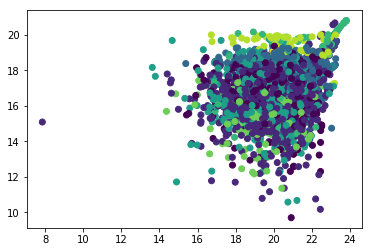

In [159]:
labels = np.array(newData['cluster'])

#label_color = [LABEL_COLOR_MAP[l] for l in labels]
plt.scatter(np.log(newData['C1']), np.log(newData['C2']), c=labels)

In [139]:
data.head(1)

,ID,target,test,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,...,a9819bda9_True,09bf8b0cf_True,d30bbe129_True,8b1379b36_True,f333a5f60_True,05c9b6799_True,a8e607456_True,c1543c985_True,76e092b8c_True,3d390e8b9_True,77f5250e3_True,83dbedc24_True,e04141e42_True,2252c7403_True,7dad769a6_True,c47340d97_True,f08c20722_True,10776252b_True,2c339d4f2_True,51d5e73a8_True,930f989bf_True,01816048b_True,29f828a0f_True,0a26a3cfe_True,b4e462a2f_True,ce549c005_True,9db026fcf_True,c906cd268_True,fb9e07326_True,67f9e982f_True,ffec49dae_True,c24634d56_True,6931ed626_True,ffa45bf70_True,1b7ec860b_True,2a6e64bb9_True,28bc37378_True,8c61bede6_True,98082c8ef_True,324e49f36_True,2c97120d8_True,d196ca1fd_True,e838549ac_True,fb32c00dc_True,d279be266_True,cb71f66af_True,066566b35_True,2d29edb0a_True,87a91f998_True,015c3e354_True,8d0774750_True,1847c8140_True,b850c3e18_True,f0aec6c6b_True,ae3aa1abd_True,b6946d764_True,dd771cb8e_True,e1121cd3e_True,6249d8488_True,2cb73ede7_True,ac37543df_True,adf357c9b_True,5089bf842_True,b8fde5765_True,c0f8422e1_True,593cccdab_True,b200c8b4a_True,2d065b147_True,762cbd0ab_True,bfc7c09df_True,735ea6729_True,b0310a768_True,857020d0f_True,0743b9c08_True,3ac1ba8f9_True,ddea5dc65_True,df221f22b_True,e592c0185_True,759c9e85d_True,a72fcabd8_True,95ba53cf8_True,2731a96a2_True,c0f5174c7_True,a3fb07bfd_True,1010d7174_True,afc08501b_True,89e7dcacc_True,1bf1406eb_True,ee0b53f05_True,defcc2c50_True,14d1d798e_True,a8e562e8e_True,ebf53ab7c_True,6b142730f_True,b8f892930_True,4d1f9e4d7_True,15e8d7f53_True,683d89bf1_True,9ed0e6ddb_True,f6c436744_True,2a7ac8010_

#### Base Model

In [52]:
import xgboost as xgb
from xgboost import XGBRegressor,plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

/home/ll/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [53]:
def rmsle(a,b):
    return np.sqrt(np.mean(np.square( np.log( (np.exp(a)) + 1 ) - np.log((np.exp(b))+1) )))

In [54]:
my_scorer = make_scorer(rmsle, greater_is_better=False)
make_scorer(rmsle)

make_scorer(rmsle)

In [55]:
def xgboostModel (df,base_y):
    X_train, X_test, y_train, y_test = train_test_split(
    df, base_y, test_size=0.7, random_state=1234, shuffle=True)

    model_xgbt = XGBRegressor(nthread=-1,seed=1234)

    eval_set = [(X_train,y_train),(X_test, y_test)]
    model_xgbt.fit(X_train,y_train, eval_set=eval_set, eval_metric='rmse',verbose=False,early_stopping_rounds=10)    
    predictvalue = model_xgbt.predict(X_test)
    result=rmsle(predictvalue,y_test)
    return result , model_xgbt

In [56]:
def RFModel (df,base_y):
    X_train, X_test, y_train, y_test = train_test_split(
    df, base_y, test_size=0.7, random_state=1234, shuffle=True)

    model_rf = RandomForestRegressor(n_jobs=-1 )#,  eval_metric=my_scorer)

    model_rf.fit(X_train,y_train)    
    predictvalue = model_rf.predict(X_test)
    result=rmsle(predictvalue,y_test)
    return result , model_rf

In [57]:
def adaboostModel (df,base_y):
    X_train, X_test, y_train, y_test = train_test_split(
    df, base_y, test_size=0.7, random_state=1234, shuffle=True)

    model_ada = AdaBoostRegressor( ) #,  eval_metric=my_scorer)

    model_ada.fit(X_train,y_train)    
    predictvalue = model_ada.predict(X_test)
    result=rmsle(predictvalue,y_test)
    return result , model_ada

In [58]:
# Base Model
base = trialori
base = np.append(base,'target')
basadata=data[data['test']==0][base]

base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
print(result)

1.5421003681536922


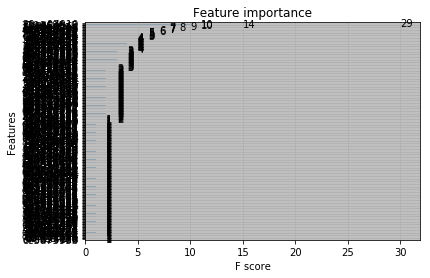

In [46]:
plot_importance(model)
pyplot.show()

#### Add total to dataset

In [59]:
base = trialori
base = np.append(base,['target','total'])
basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
print(result)

1.514049569869247


#### Original columns and ProductTrue Flag

In [60]:
tempcol=[]
for i in trialcol:
    tempcol.append(i)
for i in trialori:
    tempcol.append(i)

tempcol.append('target')
basadata=data[data['test']==0][tempcol]

base_y=np.log(basadata.target)
basadata=basadata[tempcol]
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
print(result)

1.5411273380666501


#### Cluster 2

In [61]:
base = cluster_2_col
base = np.append(base,['target'])
basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)

base = cluster_2_col
base = np.append(base,['total','target'])
basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result2,model2 = xgboostModel(basadata,base_y)

print('Without Target : ' + str(result)+  '      With Total : ' +str(result2))

Without Target : 1.754873606868363      With Total : 1.6807621293784965


#### Cluster 2 and basic original features

In [62]:
base = trialori
base = np.append(base,['target','total'])
base = np.append(base,cluster_2_col)
basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

1.514049569869247

#### Cluster 5

In [63]:
base = cluster_5_col
base = np.append(base,['target'])
basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)

base = cluster_5_col
base = np.append(base,['total','target'])
basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result2 ,model2= xgboostModel(basadata,base_y)

print('Without Target : ' + str(result)+  '      With Total : ' +str(result2))

Without Target : 1.754873606868363      With Total : 1.6807621293784965


#### Cluster 5 with basic original col

In [64]:
base = trialori
base = np.append(base,['target','total'])
base = np.append(base,cluster_5_col)
basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

1.514049569869247

#### total_No_of_Product

In [65]:
base = productCol_Percent
base = np.append(base,['target','total','total_No_of_Poduct'])

basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

1.513947249195991

In [66]:
base = productRow_Percent
base = np.append(base,['target','total','total_No_of_Poduct'])

basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

1.514049569869247

In [67]:
base = productRow_Percent
base = np.append(base,productCol_Percent)
base=np.append(base,trialori)
base = np.append(base,['target','total'])
base = list(set(base))

basadata=data[data['test']==0][base]
base_y=np.log(basadata.target)
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

1.5141636292257614

### Cluster

In [76]:
cluster_data=data[data['test']==0]
cluster_data['cluster_0_value'] = pd.DataFrame(data[data['test']==0][cluster_0.columns.values].T.sum())
cluster_data['cluster_1_value'] = pd.DataFrame(data[data['test']==0][cluster_1.columns.values].T.sum())
cluster_data['cluster_2_value'] = pd.DataFrame(data[data['test']==0][cluster_2.columns.values].T.sum())
cluster_data['cluster_3_value'] = pd.DataFrame(data[data['test']==0][cluster_3.columns.values].T.sum())
cluster_data['cluster_4_value'] = pd.DataFrame(data[data['test']==0][cluster_4.columns.values].T.sum())

In [77]:
clusterarray = ['cluster_0_value','cluster_1_value','cluster_2_value',
               'cluster_3_value','cluster_4_value','total','target','total_No_of_Poduct']
clusterarray = np.append(clusterarray,trialori)
basadata=cluster_data[clusterarray]
base_y=np.log(basadata.target)  
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

1.4809767307842647

### Cluster With Sparse PCA

In [94]:
clusterarray = ['cluster_0_value','cluster_1_value','cluster_2_value',
               'cluster_3_value','cluster_4_value','total','target','total_No_of_Poduct']
clusterarray = np.append(clusterarray,trialori)
#clusterarray = np.append(clusterarray,scdarray)
clusterarray = np.append(clusterarray,spcaarray)
clusterarray = np.append(clusterarray,productCol_Percent)

basadata=cluster_data[clusterarray]

base_y=np.log(basadata.target)  
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

#1.4786083650305801

1.4786083650305801

In [83]:
clusterarray = ['total','target','total_No_of_Poduct']
clusterarray = np.append(clusterarray,trialori)
clusterarray = np.append(clusterarray,spcaarray)
clusterarray = np.append(clusterarray,scdarray)


basadata=data[data['test']==0][clusterarray]
base_y=np.log(basadata.target)  
basadata=basadata.drop(['target'],axis=1)
result,model = xgboostModel(basadata,base_y)
result

1.5014856900280054

In [87]:
values = [[10, 20, 0], [5, 0, 15]]
types = [[1, 1, 0], [0, 2, 2]]

In [89]:
possible_types = set.union(*[set(l) for l in types])
possible_types

{0, 1, 2}

In [86]:
possible_types.discard(0)
possible_types = sorted(possible_types)

[1, 2]